# ANTEA (I)PYTHON INTRODUCTION <br> Scientific Python environment

> *ANTEA Python Workshop*  
> *March 9 and 11, 2015*

> *© 2015, Stijn Van Hoey and Joris Van den Bossche  (<mailto:stijnvanhoey@gmail.com>, <mailto:jorisvandenbossche@gmail.com>). Licensed under [CC BY 4.0 Creative Commons](http://creativecommons.org/licenses/by/4.0/)*

> This notebook is partly based on material of Jake Vanderplas (https://github.com/jakevdp/OsloWorkshop2014).

---

# Pandas: data analysis in python

For data-intensive work in Python the [Pandas](http://pandas.pydata.org) library has become essential. Pandas originally meant **Pan**el **Da**ta, though many users probably don't know that.

What is ``pandas``?

* Pandas can be thought of as NumPy arrays with labels for rows and columns, and better support for heterogeneous data types, but it's also much, much more than that.
* Pandas can also be thought of as `R`'s `data.frame` in Python.
* Powerful for working with missing data, working with time series data, for reading and writing your data, for reshaping, grouping, merging your data, ...

It's documentation: http://pandas.pydata.org/pandas-docs/stable/

In [1]:
%matplotlib inline

In [2]:
import pandas as pd

## Data structures

Pandas does this through two fundamental object types, both built upon NumPy arrays: the ``Series`` object, and the ``DataFrame`` object.

### Series

A Series is a basic holder for **one-dimensional labeled data**. It can be created much as a NumPy array is created:

In [3]:
my_series = pd.Series([0.1, 0.2, 0.3, 0.4])
my_series

0    0.1
1    0.2
2    0.3
3    0.4
dtype: float64

The series has a built-in concept of an **index**, which by default is the numbers *0* through *N - 1*

In [4]:
my_series.index

RangeIndex(start=0, stop=4, step=1)

You can access the underlying numpy array representation with the `.values` attribute:

In [5]:
my_series.values

array([ 0.1,  0.2,  0.3,  0.4])

We can access series values via the index, just like for NumPy arrays:

In [6]:
my_series[0]

0.10000000000000001

Unlike the NumPy array, though, this index can be something other than integers:

In [7]:
import numpy as np
my_series2 = pd.Series(np.arange(4), index=['a', 'b', 'c', 'd'])
my_series2

a    0
b    1
c    2
d    3
dtype: int64

In [8]:
my_series2['c']

2

In this way, a ``Series`` object can be thought of as similar to an ordered dictionary mapping one typed value to another typed value.

In fact, it's possible to construct a series directly from a Python dictionary:

In [9]:
pop_dict = {'California': 38.3,
            'Texas': 26.4,
            'New York': 19.7,
            'Florida': 19.6,
            'Illinois': 12.9}
populations = pd.Series(pop_dict)
populations

California    38.3
Florida       19.6
Illinois      12.9
New York      19.7
Texas         26.4
dtype: float64

Note that because Python dictionaries are an unordered object, the order of the resulting series will not match the order of the dictionary definition.

We can index or slice the populations as expected:

In [10]:
populations['California']

38.299999999999997

In [11]:
populations['California':'Illinois']

California    38.3
Florida       19.6
Illinois      12.9
dtype: float64

Many things we have seen for numpy, can also be used with pandas objects.

Fancy indexing, like indexing with a list or boolean indexing:

In [12]:
populations[['California', 'Florida']]

California    38.3
Florida       19.6
dtype: float64

In [13]:
populations[populations > 20]

California    38.3
Texas         26.4
dtype: float64

Element-wise operations:

In [14]:
populations / 100

California    0.383
Florida       0.196
Illinois      0.129
New York      0.197
Texas         0.264
dtype: float64

A range of methods:

In [15]:
populations.mean()

23.380000000000003

Only, pay attention to **alignment**: operations between series will align on the index:  

In [16]:
s1 = populations[['California', 'Florida']]
s2 = populations[['Florida', 'New York']]

In [17]:
s1

California    38.3
Florida       19.6
dtype: float64

In [18]:
s2

Florida     19.6
New York    19.7
dtype: float64

In [19]:
s1 + s2

California     NaN
Florida       39.2
New York       NaN
dtype: float64

### DataFrames: Multi-dimensional Data

A DataFrame is a **tabular data structure** (multi-dimensional object to hold labeled data) comprised of rows and columns, akin to a spreadsheet, database table, or R's data.frame object. You can think of it as multiple Series object which share the same index.

One of the most common ways of creating a dataframe is from a dictionary of arrays or lists.

Note that in the IPython notebook, the dataframe will display in a rich HTML view:

In [20]:
populations.values

array([ 38.3,  19.6,  12.9,  19.7,  26.4])

In [21]:
data = {'state': ['California', 'Texas', 'New York', 'Florida', 'Illinois'],
        'population': [38.3, 19.6, 12.9, 19.7, 26.4],
        'area':[424, 696, 141, 170, 150]}
states = pd.DataFrame(data)
states

,area,population,state
0,424,38.3,California
1,696,19.6,Texas
2,141,12.9,New York
3,170,19.7,Florida
4,150,26.4,Illinois


A DataFrame has besides a `index` attribute, also a `columns` attribute:

In [22]:
states.index

RangeIndex(start=0, stop=5, step=1)

In [23]:
states.columns

Index(['area', 'population', 'state'], dtype='object')

To check the data types of the different columns:

In [24]:
states.dtypes

area            int64
population    float64
state          object
dtype: object

An overview of that information can be given with the `info()` method:

In [25]:
states.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 3 columns):
area          5 non-null int64
population    5 non-null float64
state         5 non-null object
dtypes: float64(1), int64(1), object(1)
memory usage: 200.0+ bytes


Also a DataFrame has a `values` attribute, but attention: when you have heterogeneous data, all values will be upcasted:

In [26]:
states.values

array([[424, 38.3, 'California'],
       [696, 19.6, 'Texas'],
       [141, 12.9, 'New York'],
       [170, 19.7, 'Florida'],
       [150, 26.4, 'Illinois']], dtype=object)

If we don't like what the index looks like, we can reset it and set one of our columns:

In [27]:
states = states.set_index('state')
states

,area,population
state,,
California,424,38.3
Texas,696,19.6
New York,141,12.9
Florida,170,19.7
Illinois,150,26.4


To access a Series representing a column in the data, use typical indexing syntax:

In [28]:
states['area']

state
California    424
Texas         696
New York      141
Florida       170
Illinois      150
Name: area, dtype: int64

As you play around with DataFrames, you'll notice that many operations which work on NumPy arrays will also work on dataframes.

For example there's arithmetic. Let's compute the area in square miles and add a column to the data

In [29]:
states['density'] = states['population'] / states['area']
states

,area,population,density
state,,,
California,424,38.3,0.090330
Texas,696,19.6,0.028161
New York,141,12.9,0.091489
Florida,170,19.7,0.115882
Illinois,150,26.4,0.176000


We can even use masking the way we did in NumPy:

In [30]:
states[states['density'] > 0.1]

,area,population,density
state,,,
Florida,170,19.7,0.115882
Illinois,150,26.4,0.176000


And we can do things like sorting the items in the array, and indexing to take the first two rows:

In [31]:
states.sort_values(by='density', ascending=False)

,area,population,density
state,,,
Illinois,150,26.4,0.176000
Florida,170,19.7,0.115882
New York,141,12.9,0.091489
California,424,38.3,0.090330
Texas,696,19.6,0.028161


One useful method to use is the ``describe`` method, which computes summary statistics for each column:

In [32]:
states.describe()

,area,population,density
count,5.000000,5.000000,5.000000
mean,316.200000,23.380000,0.100373
std,242.673031,9.609735,0.053278
min,141.000000,12.900000,0.028161
25%,150.000000,19.600000,0.090330
50%,170.000000,19.700000,0.091489
75%,424.000000,26.400000,0.115882
max,696.000000,38.300000,0.176000


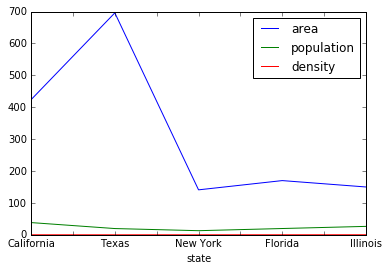

In [33]:
states.plot()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x10f85a048>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x110028828>], dtype=object)

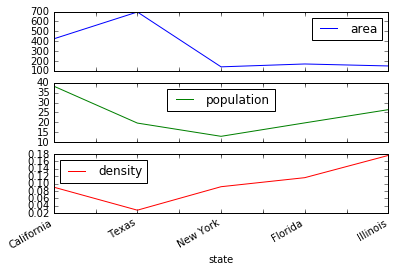

In [34]:
states.plot(subplots=True)

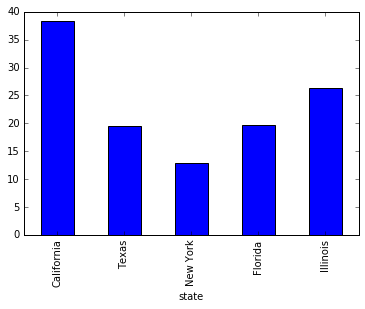

In [35]:
states['population'].plot(kind='bar')

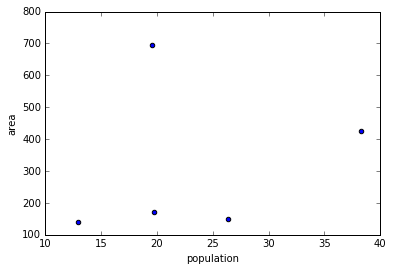

In [36]:
states.plot(kind='scatter', x='population', y='area')

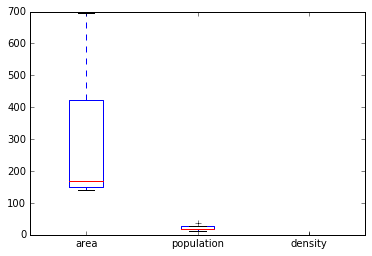

In [37]:
states.plot(kind='box')

## Some notes on selecting data

One of pandas' basic features is the labeling of rows and columns, but this makes indexing also a bit more complex compared to numpy. We now have to distuinguish between selection by label and selection by position.

For a DataFrame, basic indexing selects the columns.

Selecting a single column:

In [38]:
states['area']

state
California    424
Texas         696
New York      141
Florida       170
Illinois      150
Name: area, dtype: int64

or multiple columns:

In [39]:
states[['area', 'density']]

,area,density
state,,
California,424,0.090330
Texas,696,0.028161
New York,141,0.091489
Florida,170,0.115882
Illinois,150,0.176000


But, slicing accesses the rows:

In [40]:
states['New York':'Illinois']

,area,population,density
state,,,
New York,141,12.9,0.091489
Florida,170,19.7,0.115882
Illinois,150,26.4,0.176000


For more advanced indexing, you have some extra attributes:
    
* `loc`: selection by label
* `iloc`: selection by position

In [41]:
states.loc['New York', 'area']

141.0

In [42]:
states.loc['New York':'Florida', :]

,area,population,density
state,,,
New York,141,12.9,0.091489
Florida,170,19.7,0.115882


**Excercise**: select the area and the population column of those states where the density is larger than 0.1

Selecting by position with `iloc` works similar as indexing numpy arrays:

In [43]:
states.iloc[0:2,1:3]

,population,density
state,,
California,38.3,0.090330
Texas,19.6,0.028161


The different indexing methods can also be used to assign data:

In [44]:
states.loc['California':'New York', 'area'] = 10

In [45]:
states

,area,population,density
state,,,
California,10,38.3,0.090330
Texas,10,19.6,0.028161
New York,10,12.9,0.091489
Florida,170,19.7,0.115882
Illinois,150,26.4,0.176000


**Exercise**: add a column 'density_ratio' with the ratio of the density to the mean density

## Importing and exporting data

A wide range of input/output formats are natively supported by pandas:

* CSV, text
* SQL database
* Excel
* HDF5
* json
* html
* pickle
* ...

In [46]:
# pd.read_

In [47]:
# states.to_

## Other features

* Working with missing data (`.dropna()`, `pd.isnull()`)
* Merging and joining (`concat`, `join`)
* Grouping: `groupby` functionality
* Reshaping (`stack`, `pivot`)
* Time series manipulation (resampling, timezones, ..)
* Easy plotting

There are many, many more interesting operations that can be done on Series and DataFrame objects, but rather than continue using this toy data, we'll instead move to a real-world example, and illustrate some of the advanced concepts along the way.

See the next notebooks!